# Olympics Data Analysis

## import all necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


## Load and Merge the Data

In [2]:
region =pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv")
athlete =pd.read_csv("/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

In [3]:
df = athlete.merge(region , how ="left", on ="NOC")

In [4]:
df = athlete.merge(region , how ="left", on ="NOC")
df.rename(columns={"region": "Region",
           "notes" : "Notes"}, inplace=True)
df.head(5)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


## Describe the Data

In [5]:
df.shape

(271116, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


In [7]:
#let`s check the nan columns
na = df.isna()
nac = na.any()
nac

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [8]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

## Find The Top 10 Countries Participated

In [9]:
top_10c= df.Team.value_counts().head(10)
top_10c

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

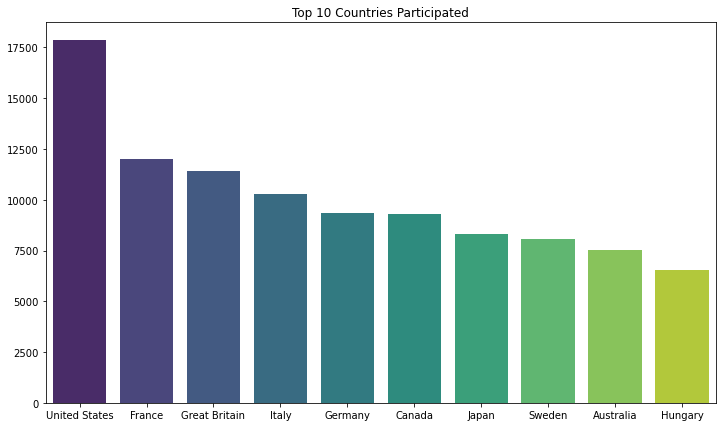

In [10]:
plt.figure(figsize=(12,7))
plt.title("Top 10 Countries Participated")
sns.barplot(x= top_10c.index, y=top_10c.values, palette="viridis")
plt.show()

## The Age Distibution Of The Participants

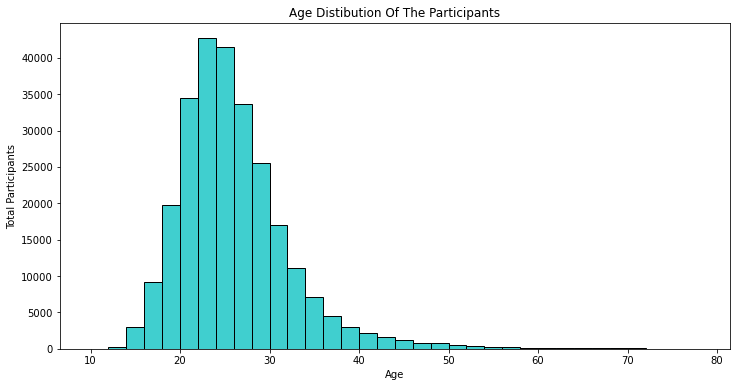

In [11]:
plt.figure(figsize=(12,6))
plt.title("Age Distibution Of The Participants")
plt.xlabel("Age")
plt.ylabel("Total Participants")
sns.histplot(x=df.Age, bins=np.arange(10,80,2), color="c")
plt.show()

In [12]:
winter_games = df[df.Season == "Winter"].Sport.unique()
summer_games = df[df.Season == "Summer"].Sport.unique()

## Gender Distibution

In [13]:
sex = df.Sex.groupby(df["Sex"]).count()
sex

Sex
F     74522
M    196594
Name: Sex, dtype: int64

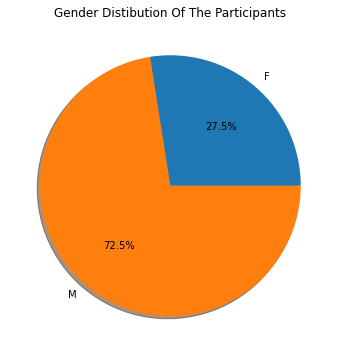

In [52]:
plt.figure(figsize=(12,6))
plt.title("Gender Distibution Of The Participants")
plt.pie(sex, labels=sex.index, autopct="%2.1f%%", shadow=True)
plt.show()

## Trend of Female Participation

In [15]:
sexw= df[df.Sex == "F"]

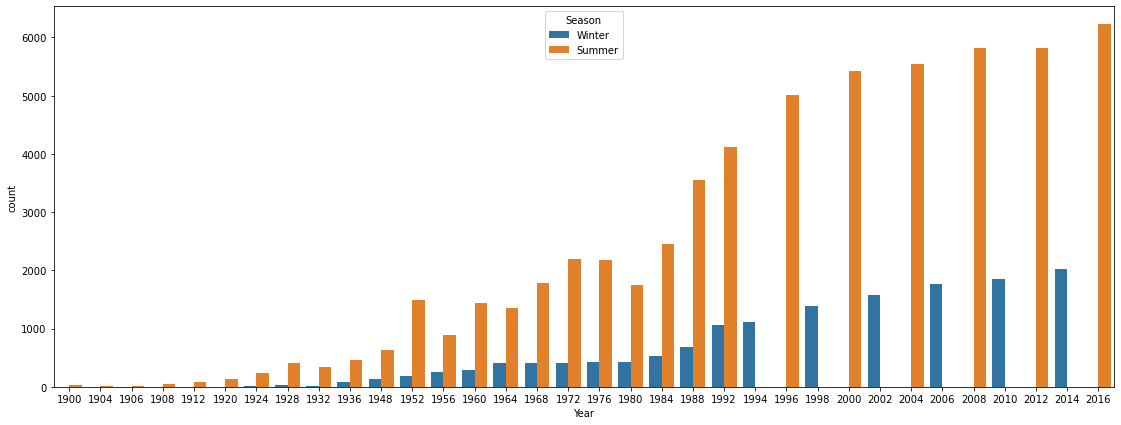

In [16]:
plt.figure(figsize=(19,7))
sns.countplot(x=sexw.Year, hue=sexw.Season)
plt.show()

## Gold Medals Veterans

In [17]:
df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [18]:
gold = df[(df.Medal== 'Gold') & (df.Age >60)]
gold = gold[np.isfinite(gold.Age)]
gold

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
104003,52626,Isaac Lazarus Israls,M,63.0,NaN,NaN,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands,NaN
105199,53238,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
226374,113773,"Galen Carter ""G. C."" Spencer",M,63.0,165.0,NaN,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN
233390,117046,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden,NaN
261102,130662,"Robert W. Williams, Jr.",M,63.0,NaN,NaN,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN


Text(0.5, 1.0, 'Gold medals for Athletes over 60 years')

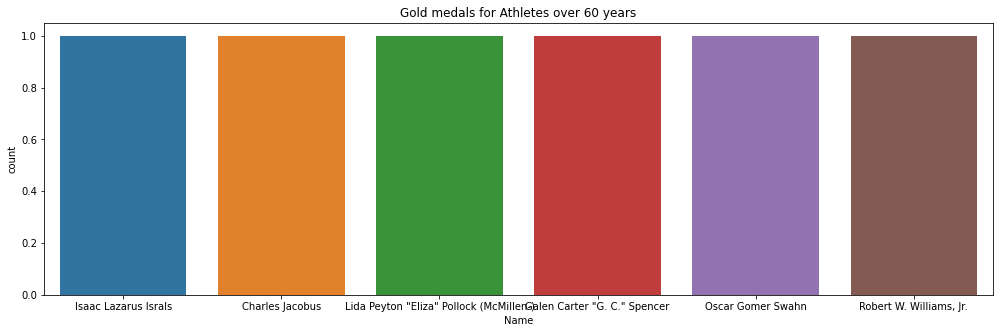

In [32]:
plt.figure(figsize=(17,5))
plt.tight_layout()
sns.countplot(x=gold.Name)
plt.title("Gold medals for Athletes over 60 years")

## Top Gold Medals Earned by Country 

In [20]:
top10_gold = df[df.Medal == "Gold"]["Region"].value_counts().reset_index(name="Medal").head(10)
top10_gold

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575
5,France,501
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


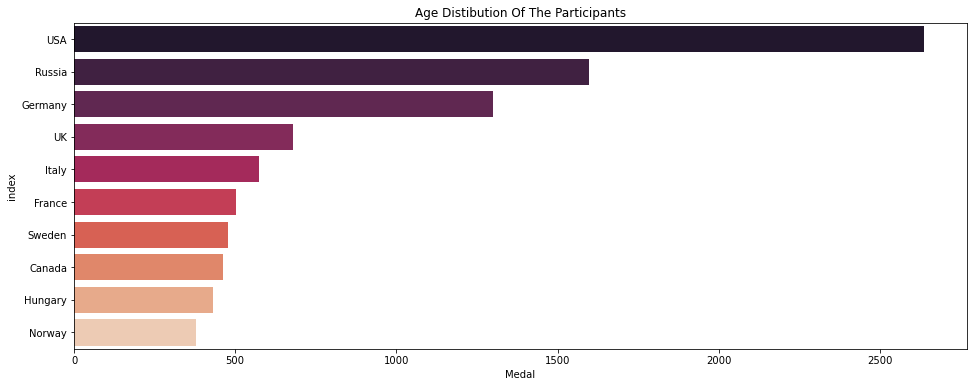

In [53]:
plt.figure(figsize=(16,6))
plt.title("Age Distibution Of The Participants")
sns.barplot(y="index", x="Medal", data=top10_gold, palette="rocket",)
plt.show()

## Height and Weight of the Athletes

In [40]:
h = df[(df.Weight.notnull()) & (df.Height.notnull())]

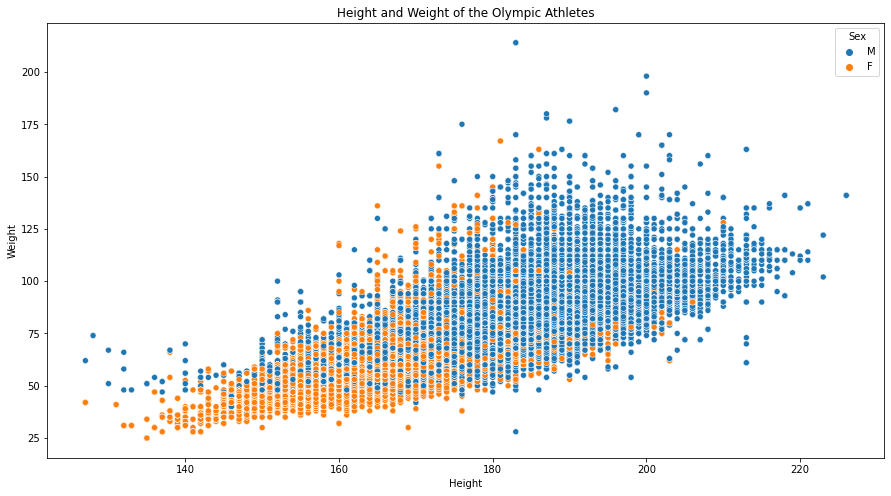

In [55]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Height", y="Weight", data=h , hue="Sex")
plt.title("Height and Weight of the Olympic Athletes")
plt.show()

### End of Analysis